## Exploratory Data Analysis

In [198]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [199]:
df = pd.read_csv("/content/cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,...,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07,NaN
565,926682,M,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,...,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07,NaN
566,926954,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,...,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08,NaN
567,927241,M,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,...,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12,NaN


In [200]:
# All Attributes

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [201]:
# Checking Null Values

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [203]:
# statistical distribution of dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,0.00
mean,30371831.43,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,NaN
std,125020585.61,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,NaN
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,NaN
25%,869218.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,NaN
50%,906024.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,NaN
75%,8813129.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,NaN
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,NaN


In [204]:
# drop unnecessary columns
df.drop(['Unnamed: 32','id'],axis =1,inplace= True)

In [205]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,...,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07
565,M,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,...,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07
566,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,...,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08
567,M,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,...,25.74,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12


In [206]:
# correlation between features
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
fractal_dimension_mean,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


<Axes: >

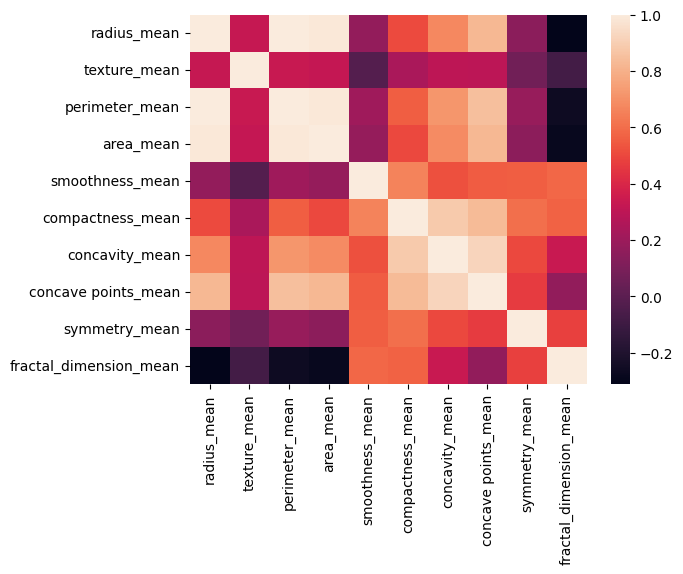

In [207]:
sns.heatmap(df.iloc[:,:11].corr())

<Axes: >

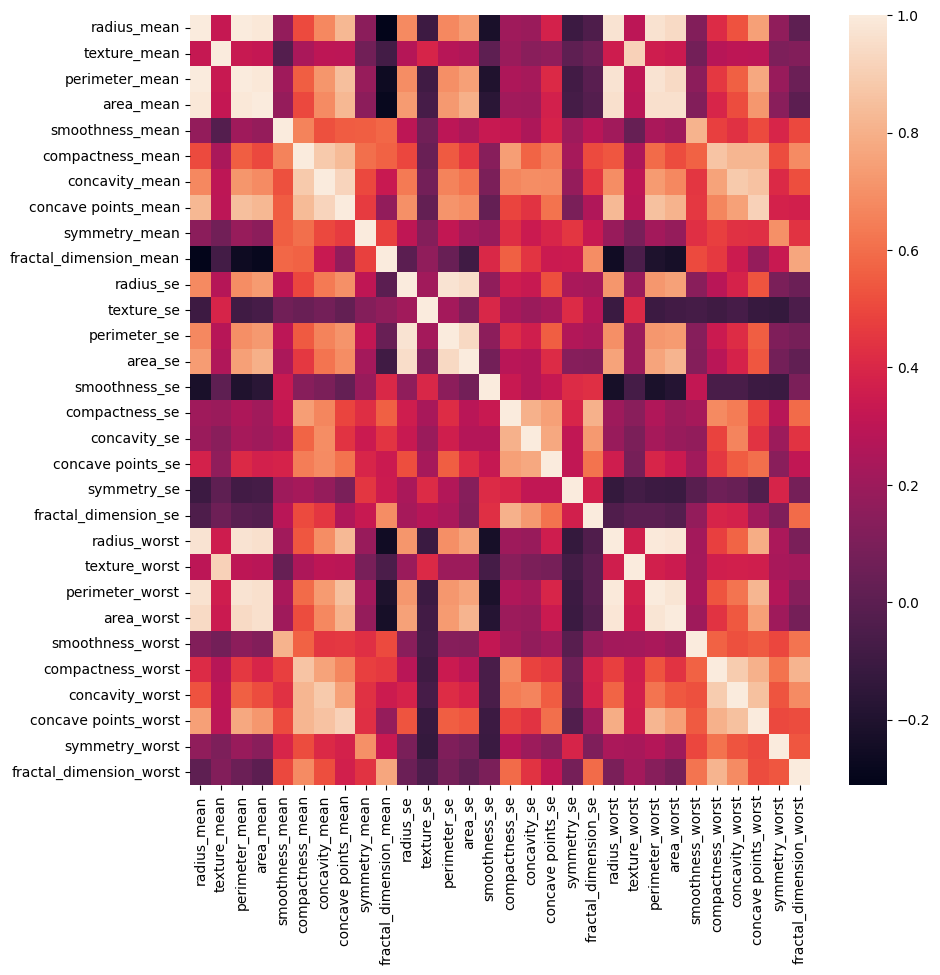

In [208]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [209]:
# Target variable Distribution
# Benign ----------> no cancer(0)
# Malignant -------> cancer (1)

df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

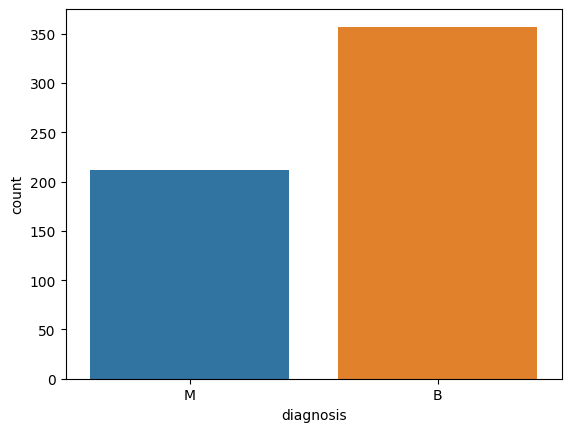

In [210]:
sns.countplot(x = df['diagnosis'],label = "count")

In [211]:
# Checking the min and max value of the two target variables
df.groupby("diagnosis").min()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
M,10.95,10.38,71.90,361.60,0.07,0.05,0.02,0.02,0.13,0.05,...,12.84,16.67,85.10,508.10,0.09,0.05,0.02,0.03,0.16,0.06


In [212]:
df.groupby("diagnosis").max()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,17.85,33.81,114.60,992.10,0.16,0.22,0.41,0.09,0.27,0.10,...,19.82,41.78,127.10,1210.00,0.20,0.58,1.25,0.17,0.42,0.15
M,28.11,39.28,188.50,2501.00,0.14,0.35,0.43,0.20,0.30,0.10,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.17,0.29,0.66,0.21


In [213]:
#Encoing the categorical data
encoder = OrdinalEncoder()
df['diagnosis'] = encoder.fit_transform(df[['diagnosis']])

In [214]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.00,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,1.00,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,1.00,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,1.00,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,1.00,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


#### Histogramplot view - To understand the distribution of one or more variables by counting the no of times.

In [215]:
df1=df.copy()
df1 = df1.drop('diagnosis',axis=1)

In [216]:
df1.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>],
       [<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>],
       [<Axes: title={'center': 'fractal_dimension_mean'}>, <Axes: >,
        <Axes: >]], dtype=object)

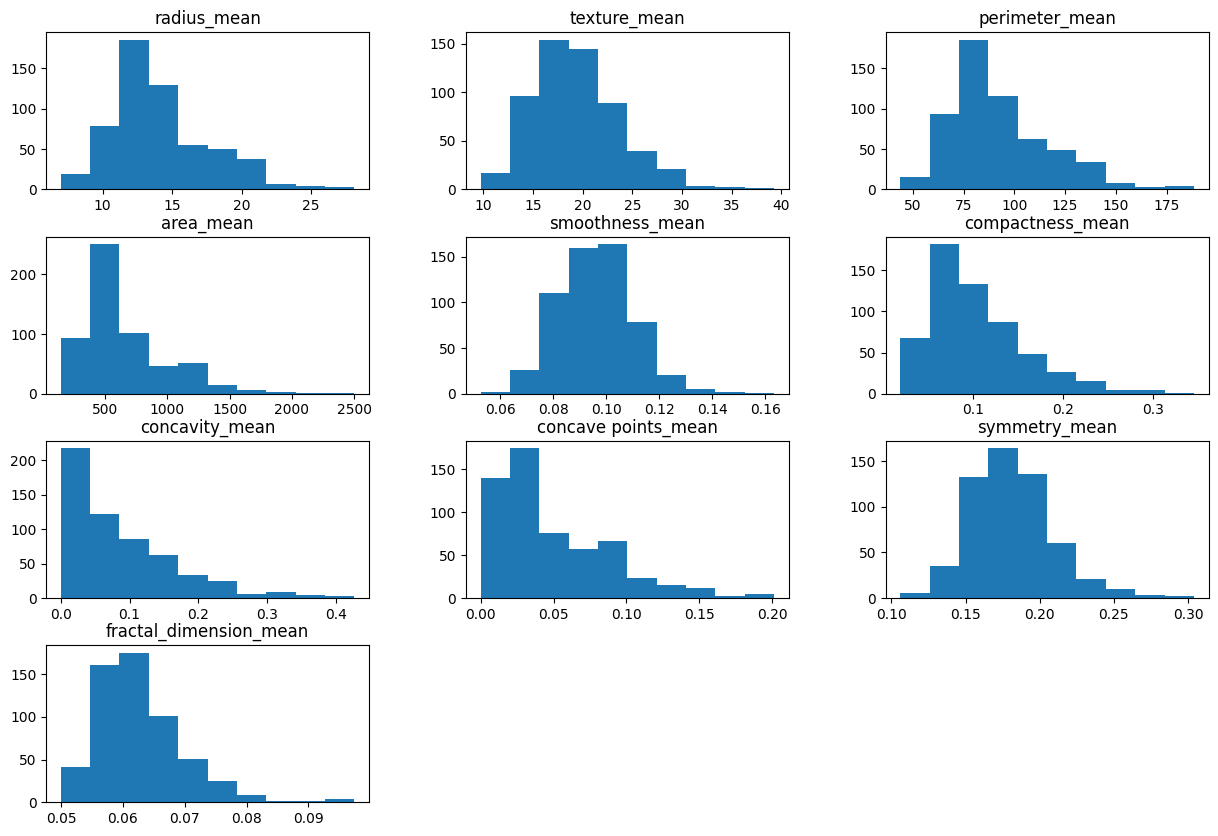

In [217]:
df1_mean = df1.iloc[:,0:10]
df1_mean.hist(bins=10,figsize=(15,10),grid =False)

[[<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]
 [<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]
 [<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]
 [<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]]


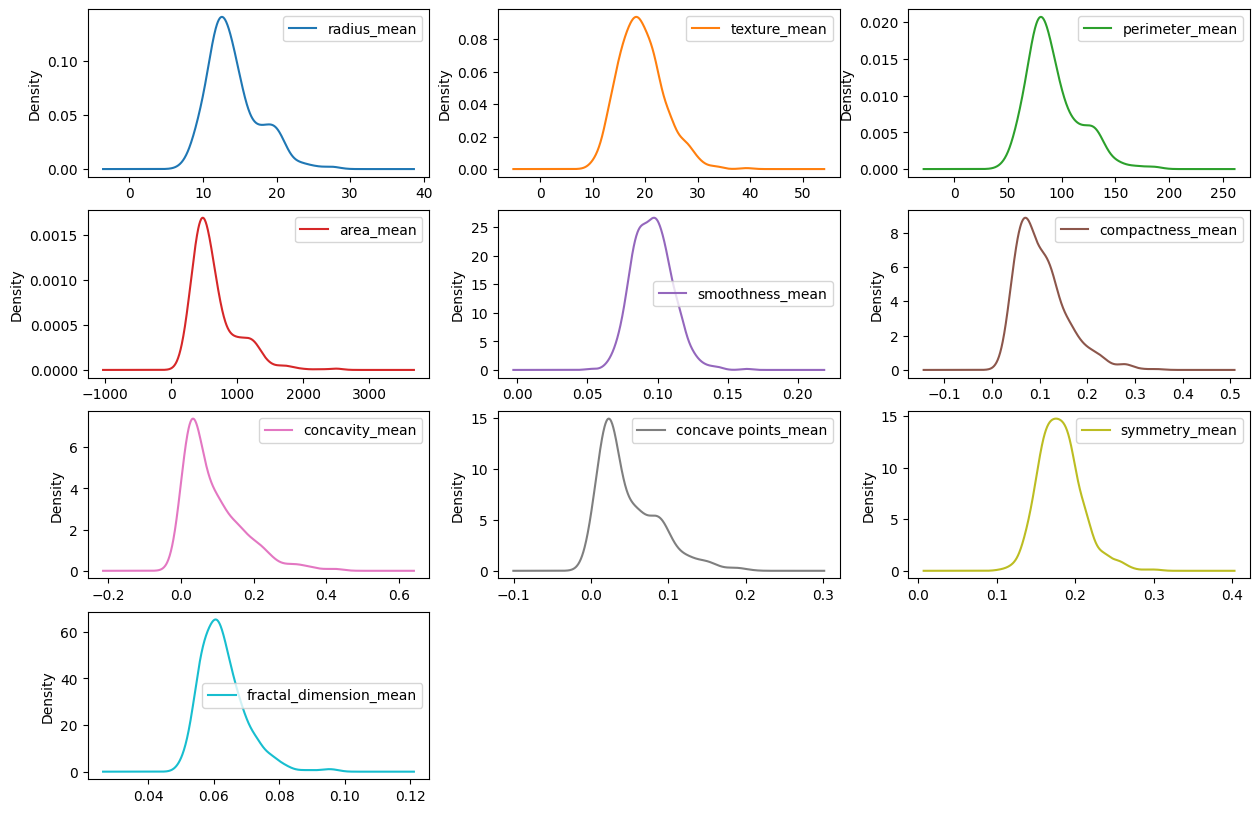

In [218]:
print(df1_mean.plot(kind = "density",figsize = (15,10),subplots = True,layout= (4,3),sharex=False))

array([[<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>],
       [<Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>],
       [<Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>],
       [<Axes: title={'center': 'fractal_dimension_se'}>, <Axes: >,
        <Axes: >]], dtype=object)

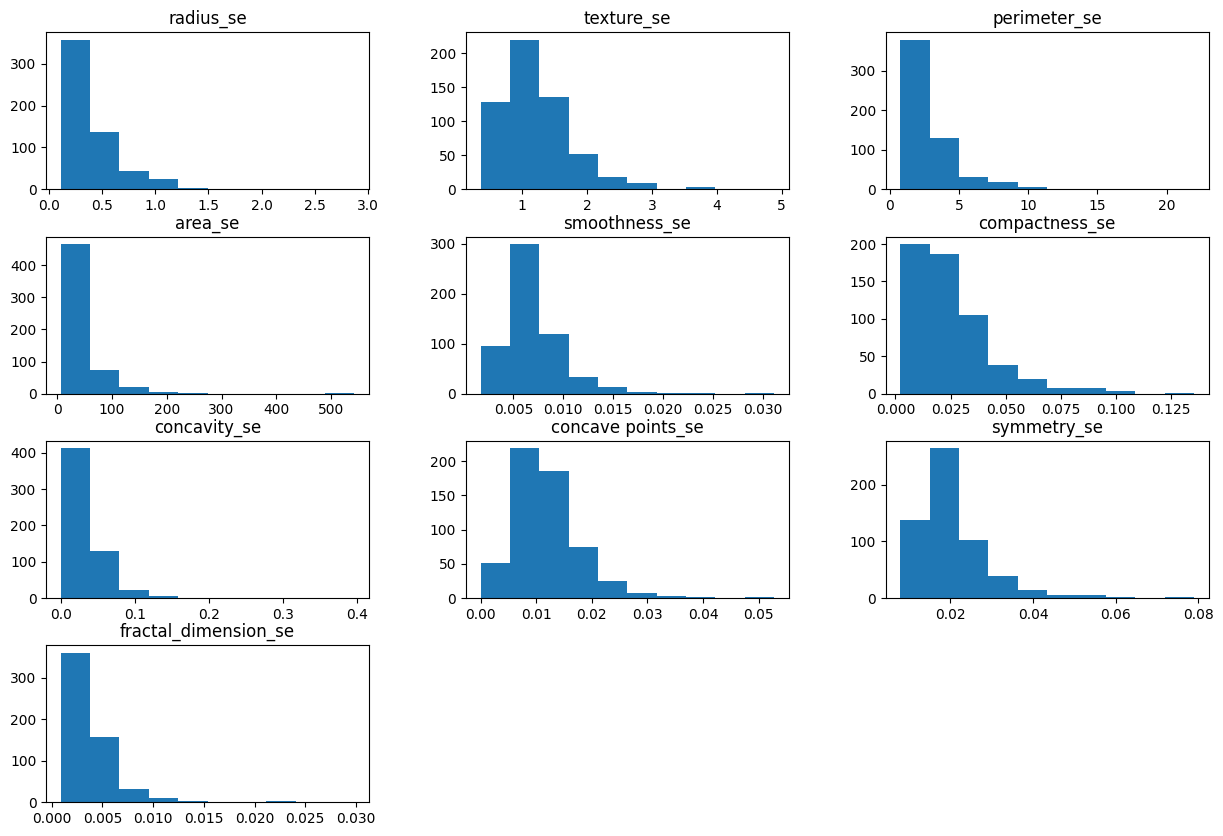

In [219]:
df1_se = df1.iloc[:,10:20]
df1_se.hist(bins=10,figsize=(15,10),grid =False)

[[<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]
 [<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]
 [<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]
 [<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]]


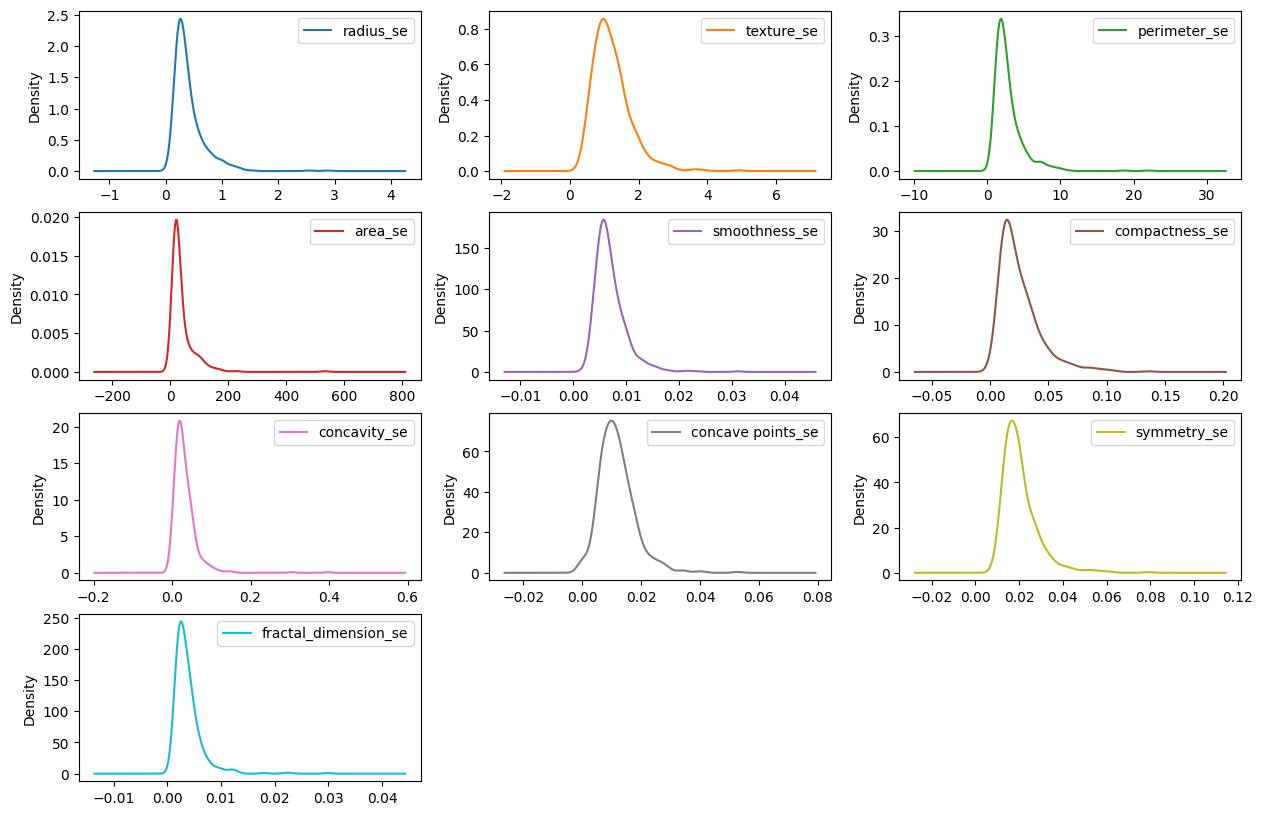

In [220]:
print(df1_se.plot(kind = "density",figsize = (15,10),subplots = True,layout= (4,3),sharex=False))

array([[<Axes: title={'center': 'radius_worst'}>,
        <Axes: title={'center': 'texture_worst'}>,
        <Axes: title={'center': 'perimeter_worst'}>],
       [<Axes: title={'center': 'area_worst'}>,
        <Axes: title={'center': 'smoothness_worst'}>,
        <Axes: title={'center': 'compactness_worst'}>],
       [<Axes: title={'center': 'concavity_worst'}>,
        <Axes: title={'center': 'concave points_worst'}>,
        <Axes: title={'center': 'symmetry_worst'}>],
       [<Axes: title={'center': 'fractal_dimension_worst'}>, <Axes: >,
        <Axes: >]], dtype=object)

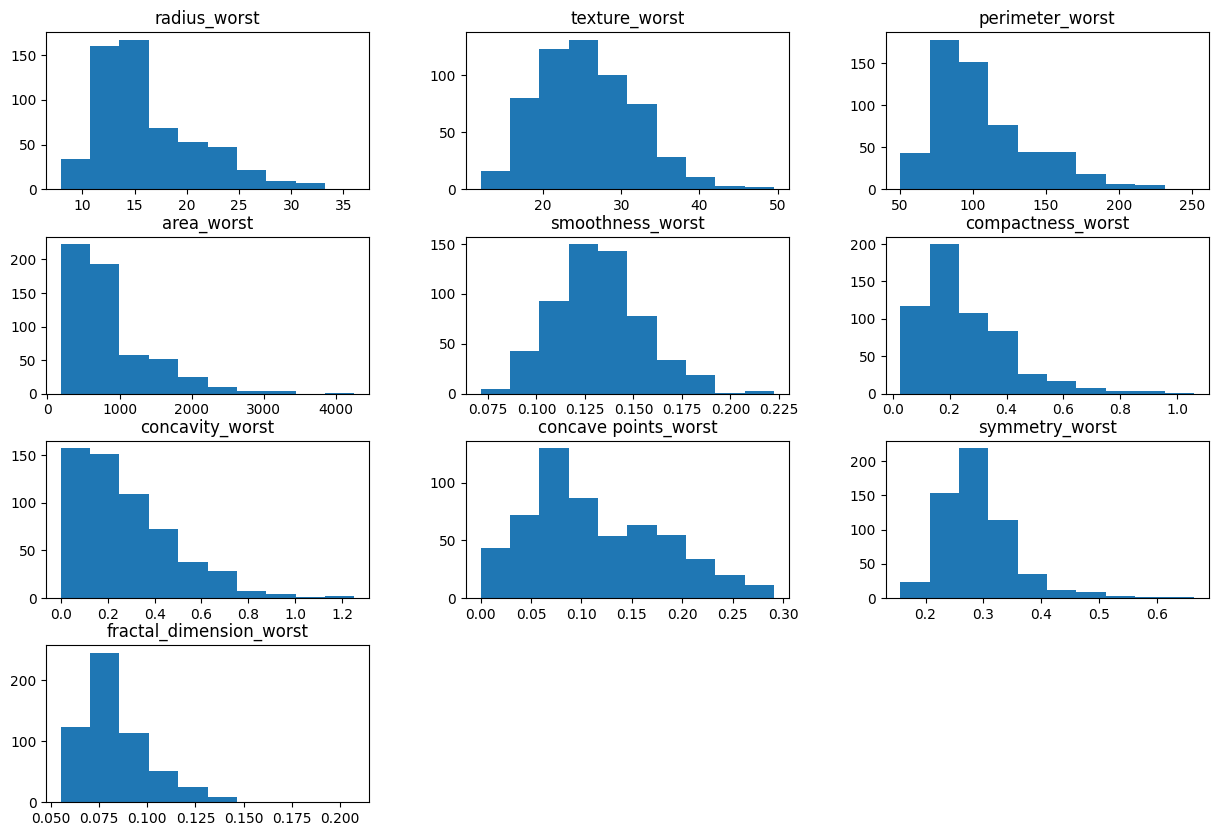

In [221]:
df1_worst = df1.iloc[:,20:30]
df1_worst.hist(bins=10,figsize=(15,10),grid =False)

[[<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]
 [<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]
 [<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]
 [<Axes: ylabel='Density'> <Axes: ylabel='Density'>
  <Axes: ylabel='Density'>]]


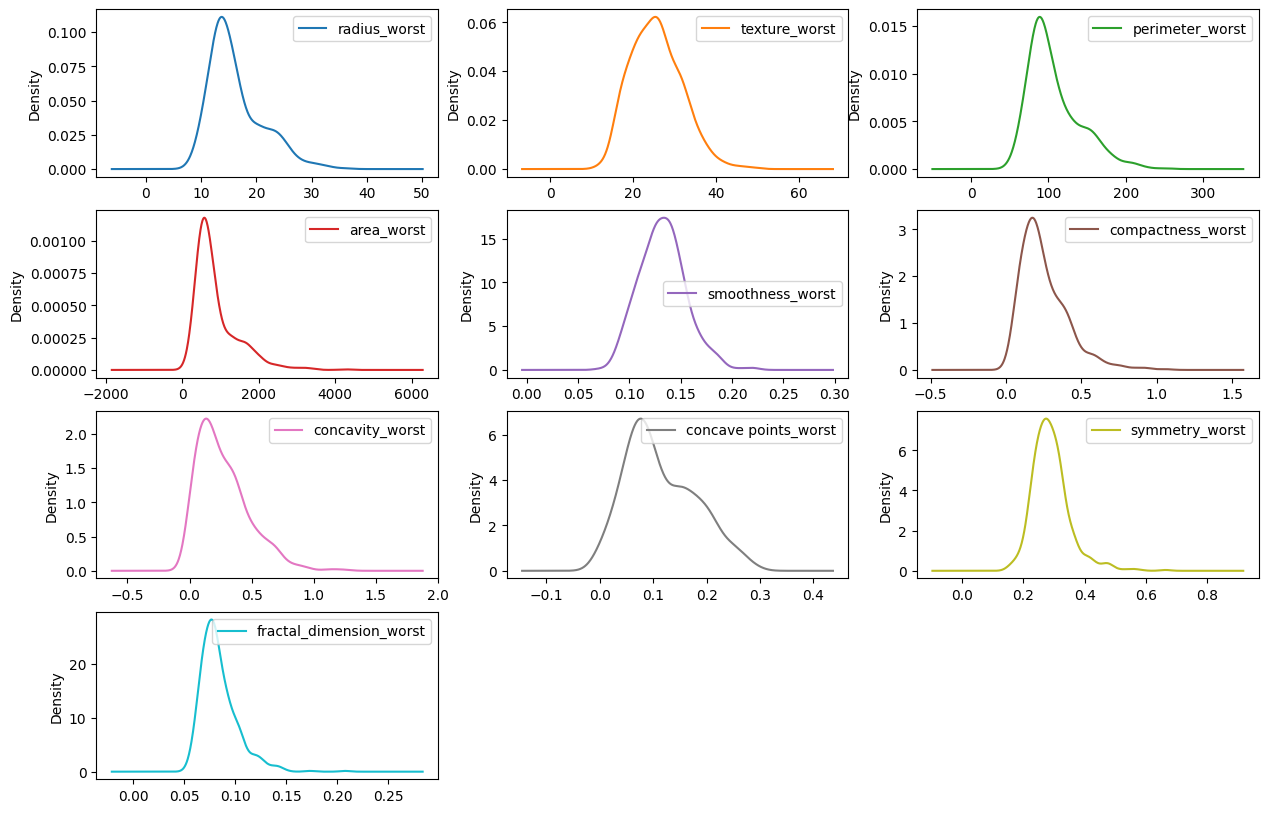

In [222]:
print(df1_worst.plot(kind = "density",figsize = (15,10),subplots = True,layout= (4,3),sharex=False))

## Splitting the model

In [223]:
# Split the dependent(X) and independent variable(y)

X = df.drop(['diagnosis'],axis = 1)
y = df['diagnosis']

In [224]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [225]:
#scaling to  standardize the features
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [226]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Algorithms Used

### Random Forest classifier

In [245]:

#  Random Forest classifier
model = RandomForestClassifier(random_state =42)


result = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = result.predict(X_test)

# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)



print("Accuracy:", accuracy_rf)
print(cm_rf)


Accuracy: 0.9649122807017544
[[64  1]
 [ 3 46]]


In [246]:
cf_report_rf  = classification_report(y_test, y_pred_rf)
print(cf_report_rf)

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        65
         1.0       0.98      0.94      0.96        49

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Gridsearchcv - Random Forest

In [251]:

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],

}

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state =42)

# Perform grid search with cross-validation
grid_search_randomforest = GridSearchCV(random_forest, param_grid, cv=5)
grid_search_randomforest.fit(X_train, y_train)

# Get the best estimator and its corresponding parameters
best_estimator = grid_search_randomforest.best_estimator_
best_params = grid_search_randomforest.best_params_

# Make predictions on the test set using the best estimator
y_pred_rf = best_estimator.predict(X_test)

# Calculate the accuracy of the best estimator
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Best Estimator Accuracy:", accuracy_rf)
print("Best Estimator Parameters:", best_params)


Best Estimator Accuracy: 0.9736842105263158
Best Estimator Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


### AdaBoostClassifier

In [230]:

from sklearn.tree import DecisionTreeClassifier

# Create an AdaBoost classifier with Decision Tree as base estimator
adaboost = AdaBoostClassifier()

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ab = adaboost.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("Accuracy:", accuracy_ab)


Accuracy: 0.9473684210526315


In [231]:
cm_ab = confusion_matrix(y_test, y_pred_ab)
print(cm_ab)

[[63  2]
 [ 4 45]]


In [232]:
cf_report_ab  = classification_report(y_test, y_pred_ab)
print(cf_report_ab)

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        65
         1.0       0.96      0.92      0.94        49

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



### Gridsearchcv -AdaBoost

In [233]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}

# Create an AdaBoost classifier with Decision Tree as base estimator
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding parameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)
print("Best Estimator Accuracy:", accuracy)
print("Best Estimator Parameters:", best_params)


Best Estimator Accuracy: 0.9649122807017544
Best Estimator Parameters: {'learning_rate': 1.0, 'n_estimators': 200}


### Gradient Boosting Classifier

In [253]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)


Accuracy: 0.9649122807017544


In [235]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)

[[64  1]
 [ 2 47]]


In [236]:
cf_report_gb  = classification_report(y_test, y_pred_gb)
print(cf_report_gb)

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        65
         1.0       0.98      0.96      0.97        49

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Gridsearchcv - Gradient Bossting Classifier

In [237]:

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
}

# Create a Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_gb = GridSearchCV(gradient_boosting, param_grid, cv=5)
grid_search_gb.fit(X_train, y_train)

# Get the best estimator and its corresponding parameters
best_estimator = grid_search_gb.best_estimator_
best_params = grid_search_gb.best_params_

# Make predictions on the test set using the best estimator
y_pred_gb = best_estimator.predict(X_test)

# Calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred_gb)
print("Best Estimator Accuracy:", accuracy)
print("Best Estimator Parameters:", best_params)

Best Estimator Accuracy: 0.9736842105263158
Best Estimator Parameters: {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 50}


#### By Evaluating using **Gridsearchcv**, with all the ensemble techniques **RandomForestClassifier** algorithm gives more accuracy compared to others.So, we can choose **RandomForestClassfier model with Bestparameters.**

## TESTING

In [238]:
newtestdata =[13.71, 20.83, 90.2, 577.9, 0.1189, 0.1645, 0.09366, 0.05985, 0.2196, 0.07451, 0.5835, 1.377, 3.856, 50.96, 0.008805, 0.03029, 0.02488, 0.01448, 0.01486, 0.005412, 17.06, 28.14, 110.6, 897.0, 0.1654, 0.3682, 0.2678, 0.1556, 0.3196, 0.1151]

In [252]:
# Make predictions on the new test data
scaler = StandardScaler()
new_test_data = np.array([newtestdata])
X_train= scaler.fit_transform(X_train)                   # fit_transform() - calculate the mean and standard deviation of each feature and transform the data accordingly
new_test_data_scale = scaler.transform(new_test_data)  #transform() method is used on the test data to apply the same scaling parameters learned from the training data.

#  Random Forest classifier with best parameters
model = RandomForestClassifier(max_depth= None,min_samples_split= 2, n_estimators =50,random_state =42)
result_rf = model.fit(X_train, y_train)

new_predicted= result_rf.predict(new_test_data_scale)


if new_predicted == 0:
    print("The Predicted Outcome is 0 ")
    print("The Cells are Benign, They are not Harmful or There is no Breast Cancer")
else:
    print("The Predicted Outcome is 1")
    print("The Cells are Malignant, They have a  Harmful effect or the Patient has a Breast Cancer!")




The Predicted Outcome is 1
The Cells are Malignant, They have a  Harmful effect or the Patient has a Breast Cancer!
